# Importing necessary libraries


In [32]:
#%pip install numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#  Data Loading and Inspection

In [33]:
import pandas as pd
covid = pd.read_csv('covid_19_clean_complete.csv')


**Project Implementation**

In [34]:
covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [35]:
covid.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [36]:
covid.describe(include='all')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
count,14664,49068,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068
unique,78,187,NaN,NaN,188,NaN,NaN,NaN,NaN,6
top,Australian Capital Territory,China,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,Europe
freq,188,6204,NaN,NaN,261,NaN,NaN,NaN,NaN,15040
mean,NaN,NaN,21.433730,23.528236,NaN,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,NaN
std,NaN,NaN,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,NaN
min,NaN,NaN,-51.796300,-135.000000,NaN,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,NaN
25%,NaN,NaN,7.873054,-15.310100,NaN,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,23.634500,21.745300,NaN,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,NaN
75%,NaN,NaN,41.204380,80.771797,NaN,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,NaN


# Data Cleaning

<Axes: >

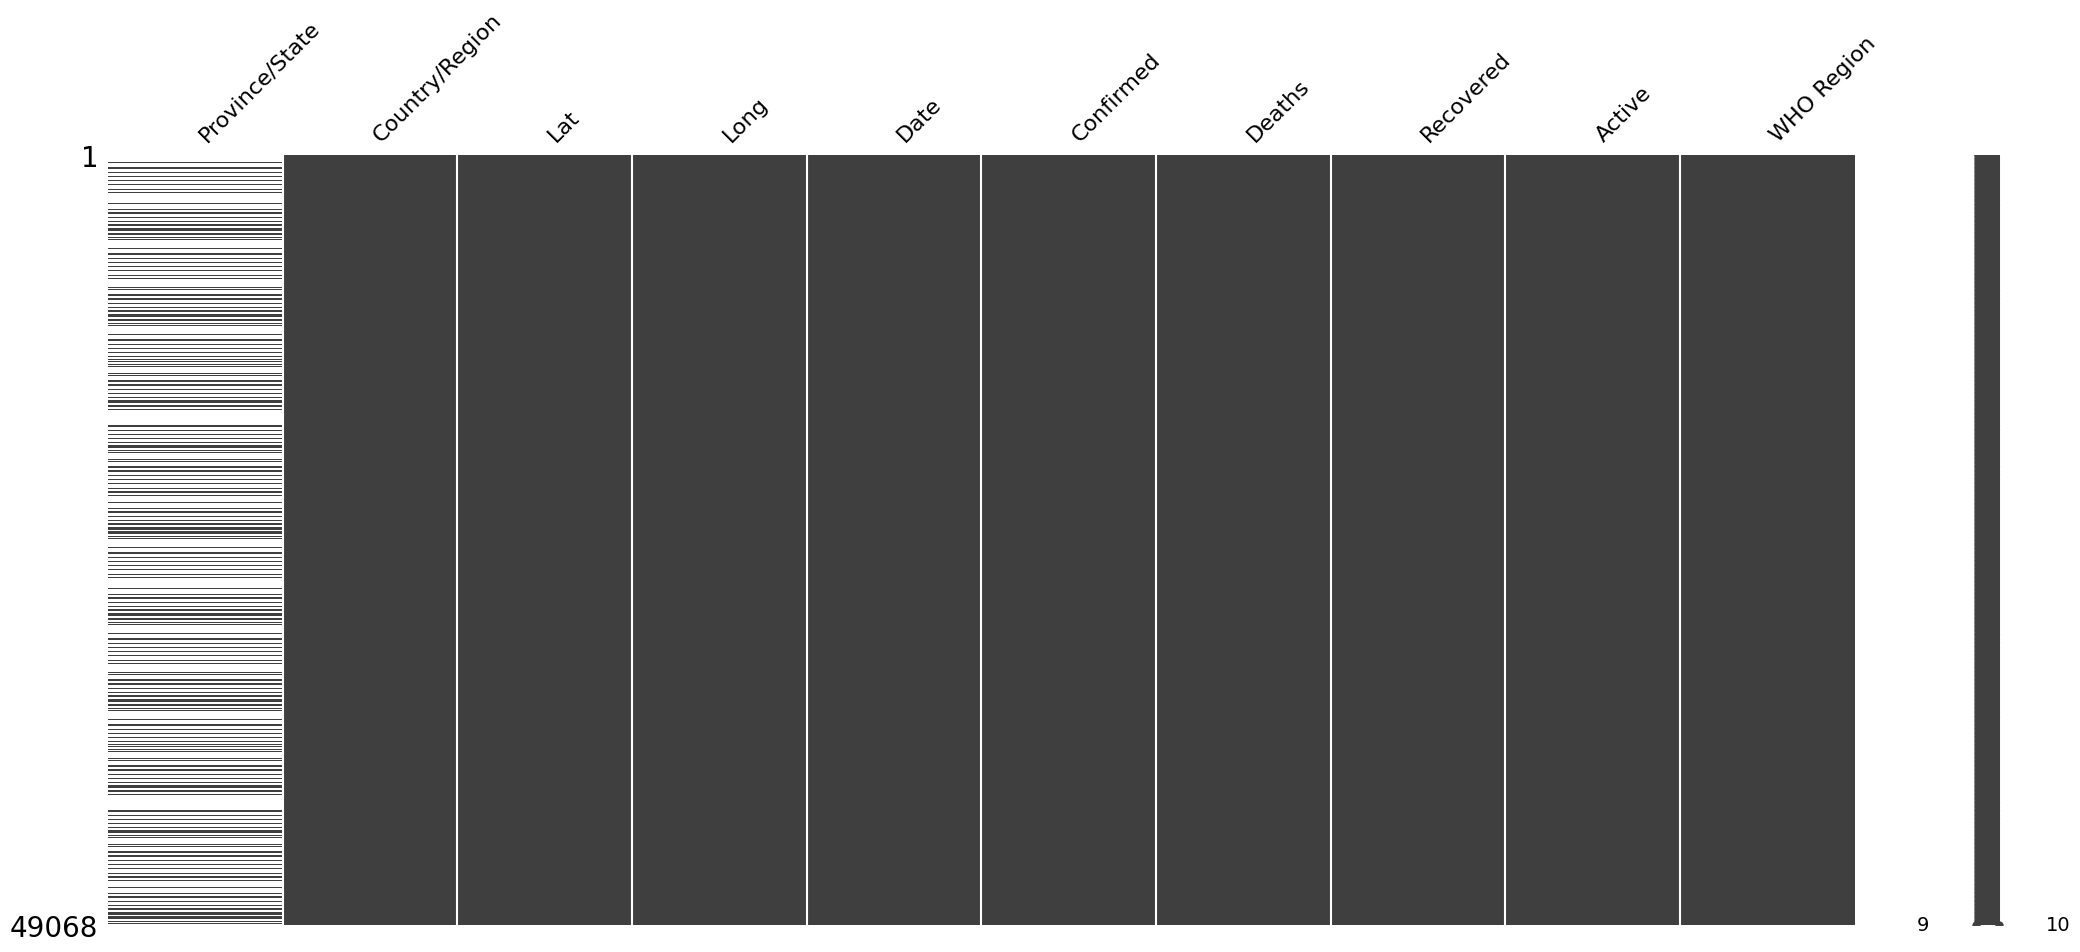

In [37]:
import missingno
missingno.matrix(covid)

In [38]:
covid.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [39]:
covid.drop(columns=['Province/State'] , inplace=True)

In [40]:
covid.isnull().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [41]:
#number of country in data sheet
covid['Country/Region'].nunique()

187

In [42]:
#The number of times each country was affected
covid['Country/Region'].value_counts()

Country/Region
China             6204
Canada            2256
France            2068
United Kingdom    2068
Australia         1504
                  ... 
Holy See           188
Honduras           188
Hungary            188
Iceland            188
Lesotho            188
Name: count, Length: 187, dtype: int64

In [43]:
covid['Deaths'].max()

np.int64(148011)

In [44]:
#the country had most deaths in datasheet 
covid.loc[covid['Deaths'] == 148011 , :]

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49030,US,40.0,-100.0,2020-07-27,4290259,148011,1325804,2816444,Americas


In [45]:
#the country had most effected  
covid['Country/Region'].mode()[0]

'China'

# Exploratory Data Analysis (EDA)

<Axes: xlabel='WHO Region', ylabel='Deaths'>

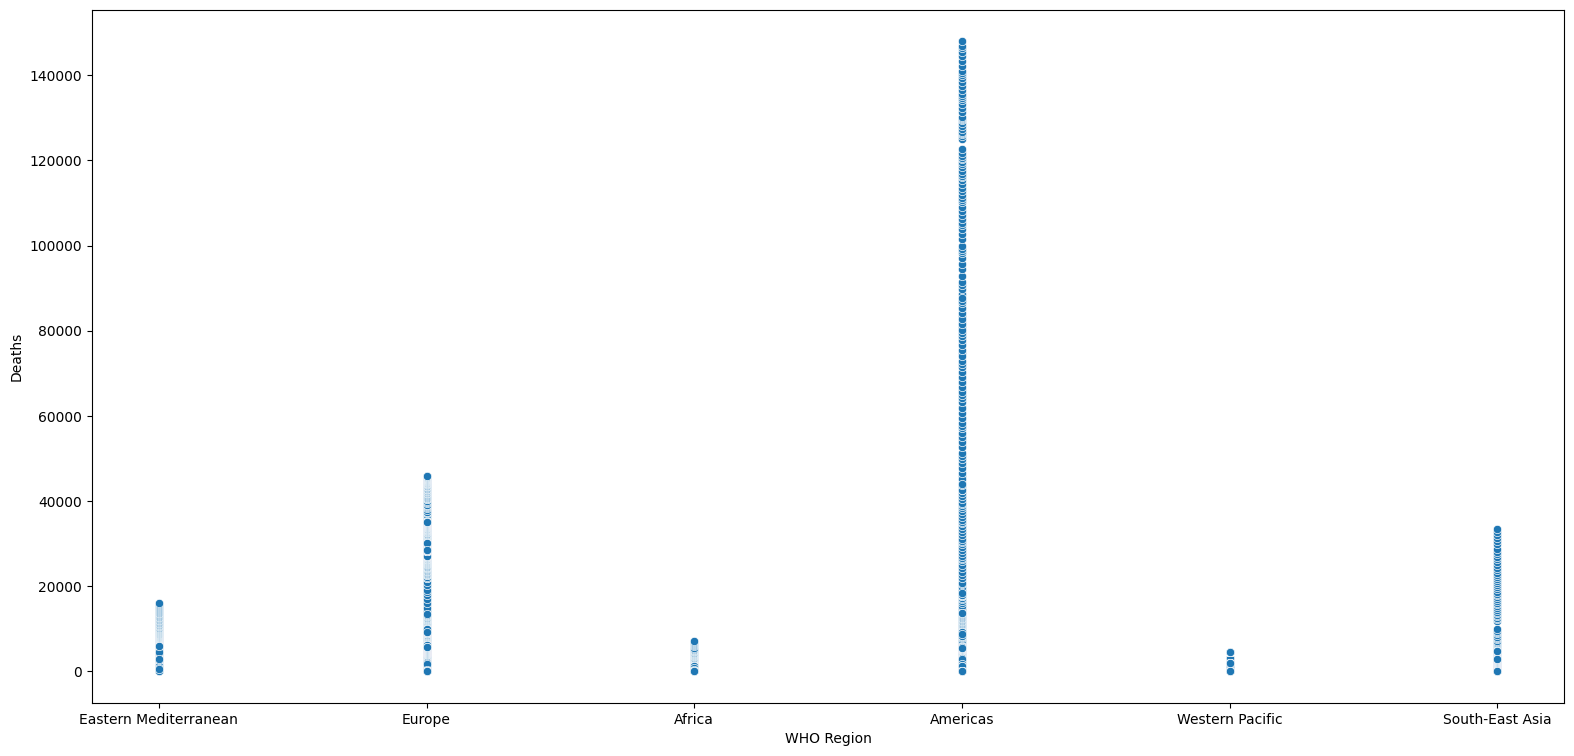

In [46]:
plt.figure(figsize=(19,9))
sns.scatterplot(covid , x= 'WHO Region' , y= 'Deaths' )

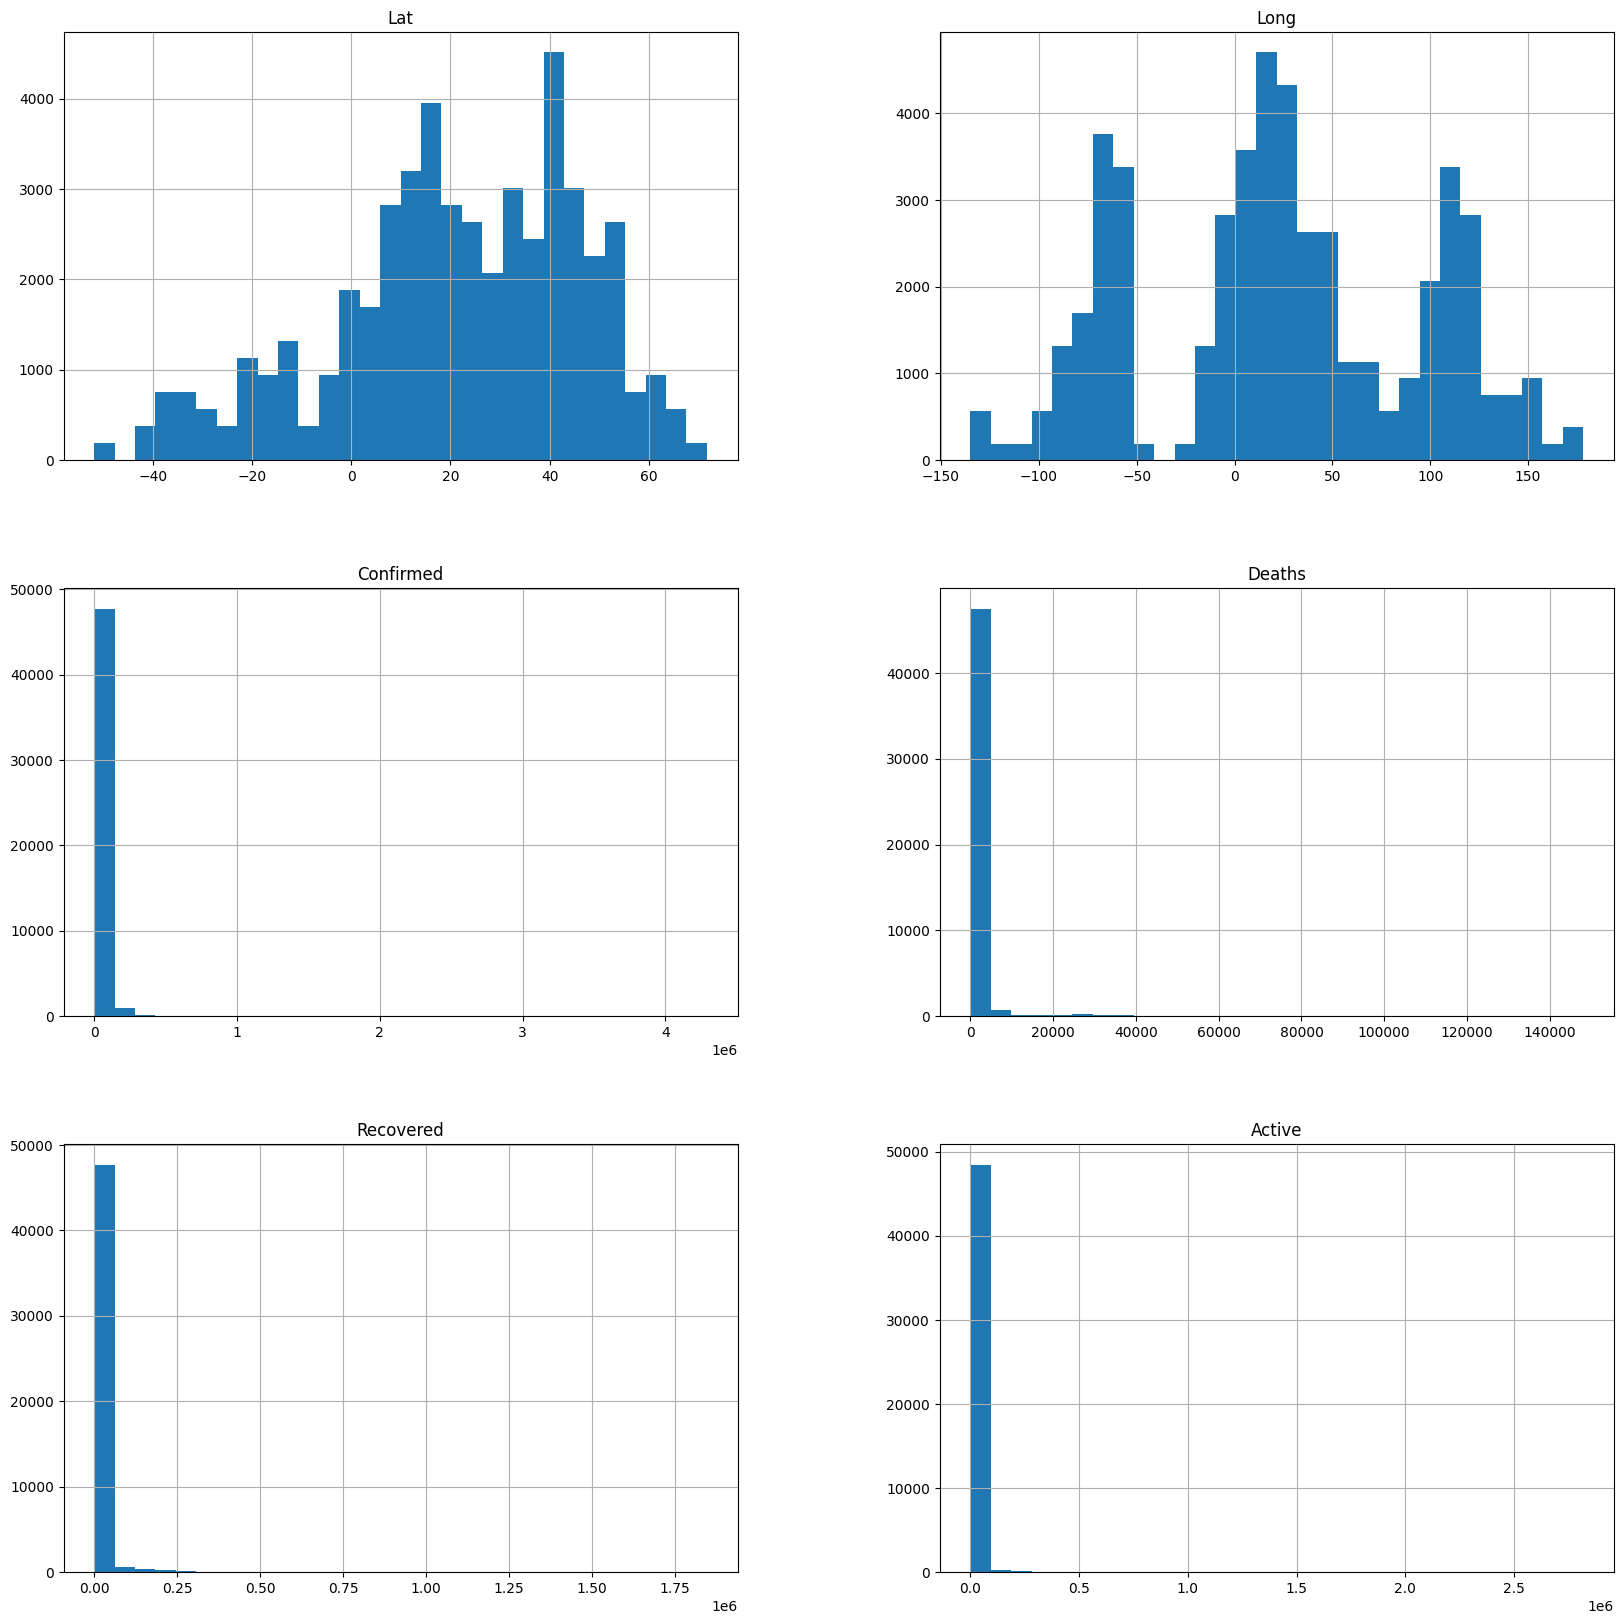

In [47]:
covid.hist(bins=30,figsize=(20,20))
plt.show()

In [48]:
num_col=list(covid.select_dtypes(include=['int64','float64']).columns)
num_col

['Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active']

<Axes: >

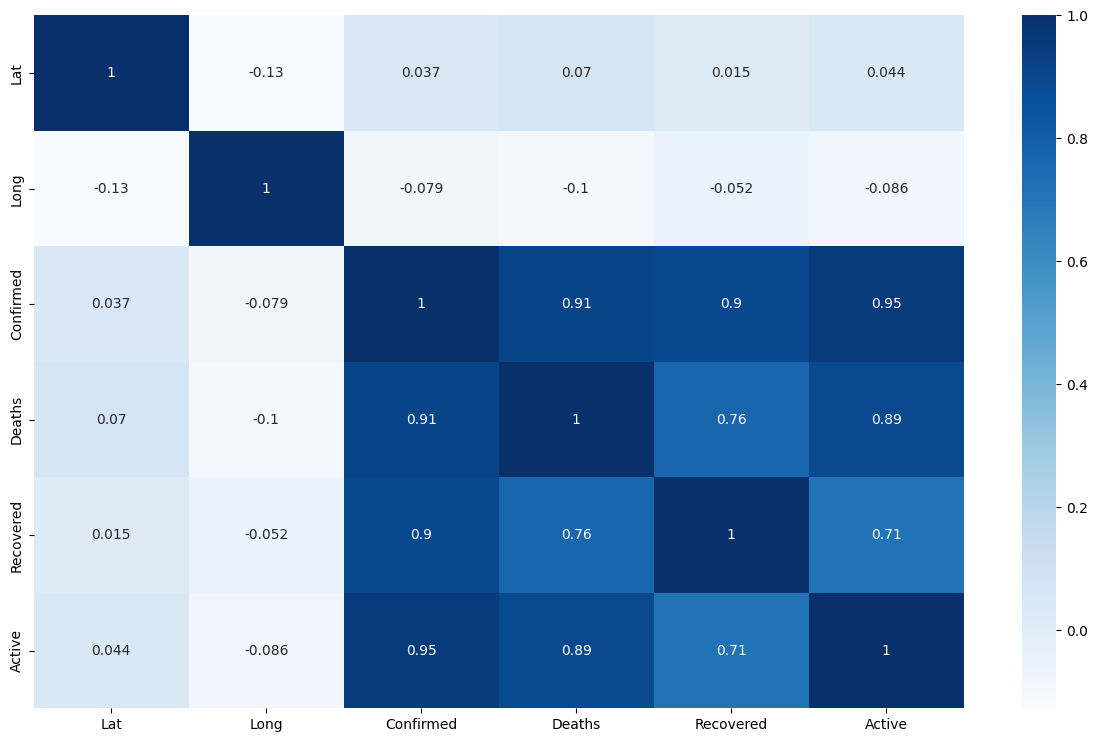

In [49]:
plt.figure(figsize=(15,9))
corr = covid[num_col].corr()
sns.heatmap(corr, annot=True , cmap ='Blues')

# Feature Engineering

In [50]:
merged_covid = covid[~(covid.Deaths <10)].reset_index(drop=True)
merged_covid

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,China,30.975600,112.270700,2020-01-22,444,17,28,399,Western Pacific
1,China,30.975600,112.270700,2020-01-23,444,17,28,399,Western Pacific
2,China,30.975600,112.270700,2020-01-24,549,24,31,494,Western Pacific
3,China,30.975600,112.270700,2020-01-25,761,40,32,689,Western Pacific
4,China,30.975600,112.270700,2020-01-26,1058,52,42,964,Western Pacific
...,...,...,...,...,...,...,...,...,...
16977,South Sudan,6.877000,31.307000,2020-07-27,2305,46,1175,1084,Africa
16978,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
16979,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
16980,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [51]:
merged_covid.sort_values(by = ['Deaths'] , ascending=True).head(20)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
2556,Canada,44.682000,-63.744300,2020-04-21,737,10,0,727,Americas
6110,Guyana,4.860416,-58.930180,2020-05-19,125,10,46,69,Americas
6114,Iceland,64.963100,-19.020800,2020-05-19,1802,10,1789,3,Europe
6134,Mauritius,-20.348404,57.552152,2020-05-19,332,10,322,0,Africa
12967,Syria,34.802075,38.996815,2020-07-03,328,10,0,318,Eastern Mediterranean
6183,Venezuela,6.423800,-66.589700,2020-05-19,749,10,253,486,Americas
6224,Costa Rica,9.748900,-83.753400,2020-05-20,897,10,582,305,Americas
12912,Mauritius,-20.348404,57.552152,2020-07-03,341,10,330,1,Africa
12910,Maldives,3.202800,73.220700,2020-07-03,2410,10,1976,424,South-East Asia
12897,Jordan,31.240000,36.510000,2020-07-03,1147,10,897,240,Eastern Mediterranean


# Additional Data Visualizations

In [52]:
merged_covid.head(1)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,China,30.9756,112.2707,2020-01-22,444,17,28,399,Western Pacific


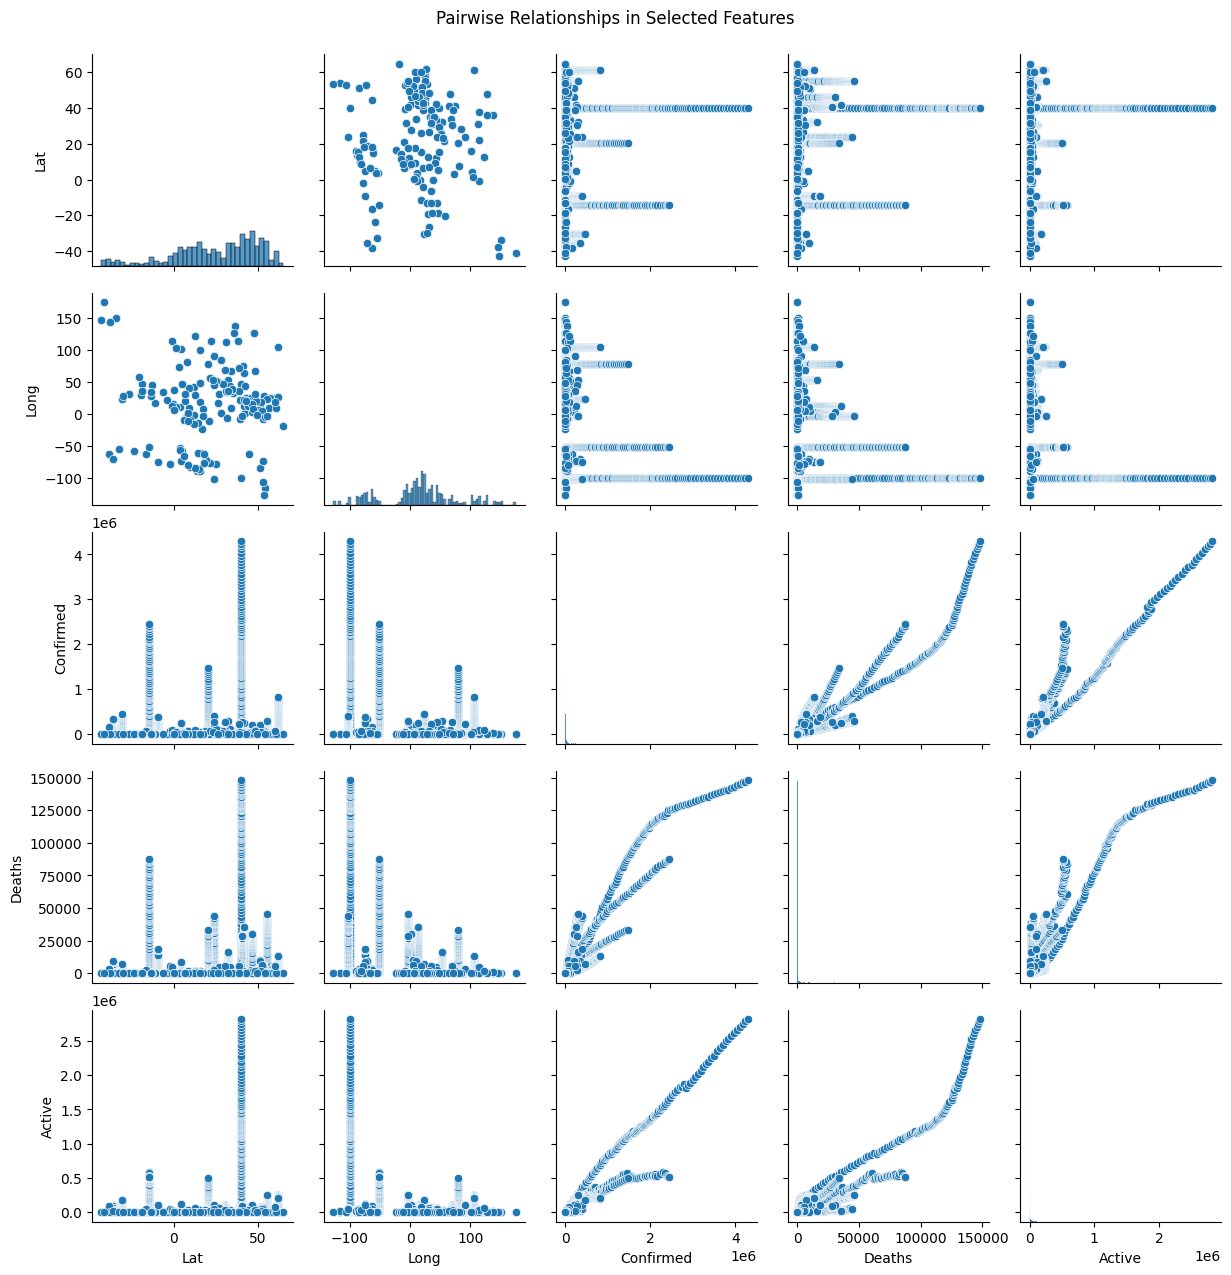

In [53]:
sns.pairplot(merged_covid[['Country/Region', 'Lat', 'Long', 'Confirmed', 'Deaths' , 'Active']])
plt.suptitle("Pairwise Relationships in Selected Features", y=1.02)
plt.show()

# Dash Board

In [60]:
from dash import Dash, html, dcc
import plotly.express as px


In [56]:
app = Dash()

In [79]:
merged_covid.head(0
                  )

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region


In [91]:
app.layout = html.Div([
    html.H1("COVID-19 Data Dashboard"),
    
    dcc.Graph(
        id='scatter-plot',
        figure=px.scatter(covid, x='WHO Region', y='Deaths', color='Country/Region', title='Deaths by WHO Region')
    ),
    
    dcc.Graph(
        id='heatmap',
        figure=px.imshow(corr, title='Correlation Heatmap')
    ),
    
    dcc.Graph(
        id='pairplot',
        figure=px.scatter_matrix(merged_covid, dimensions=['Confirmed', 'Deaths', 'Recovered', 'Active'], title='Pairwise Relationships')
    ),
    
    dcc.Graph(
        id='scatter_polar',
        figure=px.choropleth(merged_covid, locations='Country/Region', locationmode='country names' ,color='Deaths', title='Deaths by Country',animation_frame='Date' ,scope='world')
    ),
    dcc.Graph(
        id='pie',
        figure=px.pie(merged_covid, names='WHO Region', values='Recovered', title='Recovered Cases by WHO Region')
    )
])

if __name__ == '__main__':
    app.run_server(port=8050)

In [62]:
from dash import Dash, html, dcc

import plotly.express as px
import plotly.graph_objects as go

# إنشاء تطبيق Dash
app = Dash()

# إنشاء الرسوم البيانية
scatter_plot = px.scatter(covid, x='WHO Region', y='Deaths', color='Country/Region', title='Deaths by WHO Region')
histogram = px.histogram(covid, x='Deaths', nbins=30, title='Distribution of Deaths')
pairplot = px.scatter_matrix(merged_covid, dimensions=['Confirmed', 'Deaths', 'Recovered', 'Active'], title='Pairwise Relationships')

# إنشاء تخطيط الداش بورد
app.layout = html.Div([
    html.H1("COVID-19 Data Dashboard"),
    
    dcc.Graph(
        id='scatter-plot',
        figure=scatter_plot
    ),
    
    dcc.Graph(
        id='heatmap',
        figure=heatmap
    ),
    
    dcc.Graph(
        id='histogram',
        figure=histogram
    ),
    
    dcc.Graph(
        id='pairplot',
        figure=pairplot
    )
])

# تشغيل التطبيق
if __name__ == '__main__':
    app.run_server(port=8050)